In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from queue import PriorityQueue
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np


# Define the file path at the top
G_link = '/content/drive/MyDrive/Data (1)/Graph_2.csv'

In [1]:
class Graph:
    def __init__(self, name=''):
        self.name = name
        self._list_luu = {}    # adjacency list to store graph
        self._dem_canh = 0   # total edges
        self._layout = None    # layout for consistent visualization

    def add_edge(self, start, end, weight):
        if start not in self._list_luu:
            self._list_luu[start] = []
        if end not in self._list_luu:
            self._list_luu[end] = []
        self._list_luu[start].append((end, weight))
        self._list_luu[end].append((start, weight))
        self._dem_canh += 1

    def tai_dothi(self, path):
        data = pd.read_csv(path)
        for _, row in data.iterrows():
            self.add_edge(row['v_from'], row['v_to'], row['weight'])
        self._set_layout()

    def _set_layout(self):
        G = nx.Graph()
        for node, neighbors in self._list_luu.items():
            for neighbor, weight in neighbors:
                G.add_edge(node, neighbor, weight=weight)
        self._layout = nx.spring_layout(G)

    def dijkstra(self, source, destination):
        # Initialize distances and free status
        distances = {node: float('inf') for node in self._list_luu}
        previous_nodes = {}
        free = {node: True for node in self._list_luu}

        # Set the source distance to zero
        distances[source] = 0
        queue = PriorityQueue()
        queue.put((0, source))

        while not queue.empty():
            current_distance, u = queue.get()
            if not free[u]:  # Skip nodes that are already free
                continue
            free[u] = False  # Mark the current node as free

            # For each neighbor v of u, check if there's a shorter path
            for v, weight in self._list_luu.get(u, []):
                if free[v] and distances[v] > distances[u] + weight:
                    distances[v] = distances[u] + weight
                    previous_nodes[v] = u
                    queue.put((distances[v], v))

        # Check if a path exists to the destination
        if free[destination]:
            print(f"Không tìm thấy đường từ {source} đến {destination}")
            return float('inf'), []

        # Reconstruct the shortest path
        path, current = [], destination
        while current != source:
            path.append(current)
            current = previous_nodes.get(current)
            if current is None:
                return float('inf'), []  # No path found
        path.append(source)
        return distances[destination], path[::-1]

    def display(self, path=[], title=''):
        title = title or self.name
        G = nx.Graph()
        path_edges = {(path[i], path[i + 1]) for i in range(len(path) - 1)}

        for node, neighbors in self._list_luu.items():
            for neighbor, weight in neighbors:
                color = 'red' if (node, neighbor) in path_edges or (neighbor, node) in path_edges else 'black'
                G.add_edge(node, neighbor, weight=weight, color=color)

        edge_colors = [G[u][v]['color'] for u, v in G.edges()]
        edge_labels = nx.get_edge_attributes(G, 'weight')

        nx.draw(G, pos=self._layout, with_labels=True, node_size=700, node_color='lightblue', edge_color=edge_colors)
        nx.draw_networkx_edge_labels(G, pos=self._layout, edge_labels=edge_labels)
        plt.title(title)
        plt.show()

    def get_shortest_path(self, start, end):
        min_cost, path = self.dijkstra(start, end)
        if min_cost == float('inf'):
            print(f"Không tìm thấy đường từ {start} đến {end}")
            return None, None
        self.display(path, title=f'Đường đi ngắn nhất từ {start} đến {end} có chi phí là {min_cost}')
        return min_cost, path

    def get_list_luu(self):
        return self._list_luu

    def get_vertex_count(self):
        return len(self._list_luu)

    def get_dem_canh(self):
        return self._dem_canh


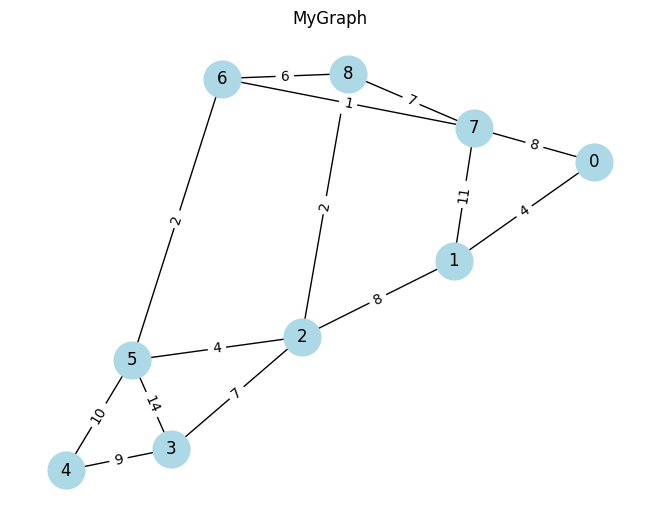

In [ ]:
graph = Graph('MyGraph')
graph.tai_dothi(G_link)
graph.display()

Nhập vào đỉnh bắt đầu(start) và đỉnh kết thúc(end): 7 2


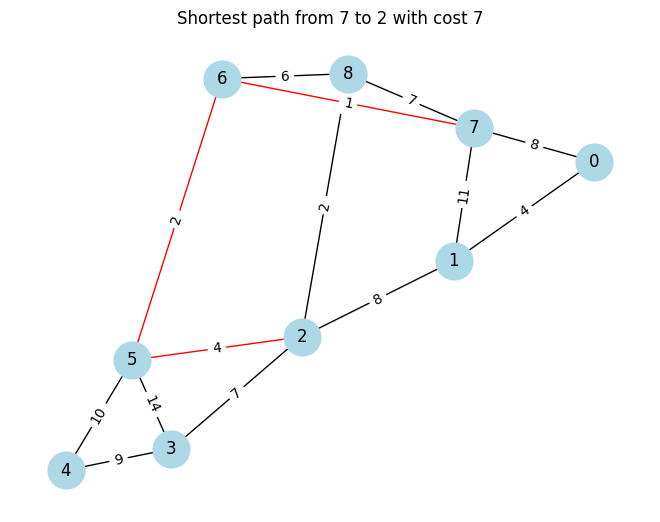

In [ ]:
start, end = map(int, input('Nhập vào đỉnh bắt đầu(start) và đỉnh kết thúc(end): ').split())
min_cost, path = graph.get_shortest_path(start, end)